# Data Visualization Final Project
  -- by Soham Chakraborty


# Introduction

Environmental Pollution, particularly air quality and water pollution, has become a growing concern for urban areas worldwide. This project aims to investigate the trends in air quality and water pollution in cities globally, with a specific focus on regions and cities in France. By analyzing spatial trends and exploring the relationship between these two critical pollution indicators, the study seeks to provide some insights on the pollution levels which might help in further research on this subject. 

This data has been taken from Kaggle (Source - https://www.kaggle.com/datasets/cityapiio/world-cities-air-quality-and-water-polution/data), but originaly it is from Numbeo, a Serbian crowd-sourced online database of perceived consumer prices, real property prices, and quality of life metrics and other topics of different countries and cities. Numbeo's data collection process involves a combination of user-generated input and manually gathered information from reputable sources such as supermarket, company websites and governmental institutions. For more information please refer from the site: https://www.numbeo.com/common/motivation_and_methodology.jsp

The dataset contains 5 columns and 3963 records. Overall file size is around 231 KB. 
The columns are:
- City: The name of the city. (Categorical Data)
- Region: The region or state where the city is located. (Categorical Data)
- Country: The country in which the city is situated. (Categorical Data)
- Air Quality: A numeric score representing the air quality index of the city, with 0 indicating bad quality and 100 indicating top good quality (Continuous Data)
- Water Pollution: A numeric score representing the water pollution level in the city, with 0 indicating no water pollution and 100 indicating extreme pollution. (Continuous Data)

Data was Collected on October 2021 , as given in the data set file name - cities_air_quality_water_pollution.18-10-2021.csv
This dataset is one of the public parts of City API project data from Numbeo. It was collected to compare the Air quality index and Water Pollution index between different cities of the world. The dataset's License is CC0: Public Domain (CC0 1.0 Universal) . A Creative Commons (CC) license is one of several public copyright licenses that enable the free distribution of an otherwise copyrighted "work".

## Preprocessing and Data Cleaning

To ensure the dataset's accuracy and consistency, preprocessing steps were implemented. Column names were cleaned to remove unnecessary spaces and quotation marks. String values across the dataset, particularly in the "Region" and "Country" columns, were stripped of leading and trailing quotes and spaces. Missing values in the "Region" column were replaced with "Other Regions" to handle ambiguities. Numerical columns, such as "AirQuality" and "WaterPollution," were converted to numeric types for proper calculations and visualizations. These preprocessing steps ensured a clean, structured dataset, enabling reliable grouping, sorting, and visualizations for meaningful analysis.


In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('cities_air_quality_water_pollution.18-10-2021.csv')
data.head()


,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [3]:
import warnings
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Clean column names to remove extra spaces and quotes
data.columns = data.columns.str.strip().str.replace('"', '')

# Remove quotes and extra spaces from string values in all columns
data = data.applymap(lambda x: x.strip('"').strip() if isinstance(x, str) else x)

# Replace empty strings in 'Region' with 'Other Regions'
data['Region'] = data['Region'].replace('', 'Other Regions')

# Ensure numeric columns are correctly parsed
data['AirQuality'] = pd.to_numeric(data['AirQuality'], errors='coerce')
data['WaterPollution'] = pd.to_numeric(data['WaterPollution'], errors='coerce')

In [4]:
# Filter dataset for analysis of France
data_france = data[data['Country'].str.contains('France', case=False)]

# Drop rows with missing values for France-specific analysis
data_france = data_france.dropna()

# Verify the France-specific data
print("France-specific Data Sample:")
print(data_france.head())

France-specific Data Sample:
            City         Region Country  AirQuality  WaterPollution
13         Paris  Ile-de-France  France   34.024390       43.121693
24         Tours  Other Regions  France   84.375000        6.250000
38  Villeurbanne  Other Regions  France   75.000000       50.000000
48        Rennes  Other Regions  France   62.500000       35.000000
49         Lille  Other Regions  France   48.913043       35.526316


# Research Question

How do air quality and water pollution vary across regions and cities in France ?

Sub questions - 
- What are the regional trends in air quality and water pollution in France?
- Which cities in France have the best and worst air quality and water pollution?
- What is the relationship between air quality and water pollution in French cities?

# Sub-Question 1: What are the regional trends in air quality and water pollution in France?

Understanding regional variations is crucial for directing resources and interventions to high-pollution areas. By identifying trends at the regional level, policymakers can design targeted strategies to mitigate environmental issues.

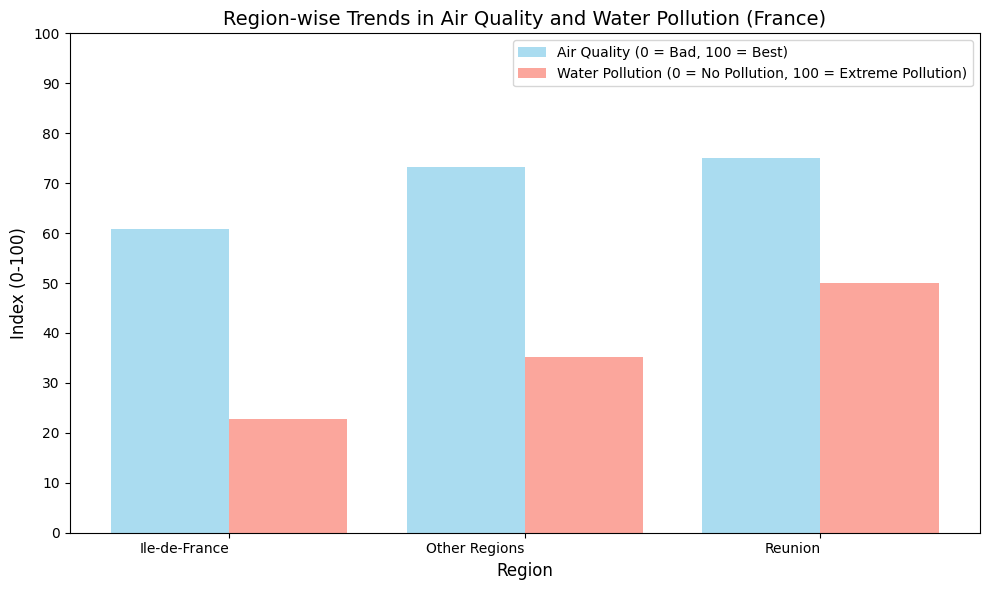

In [6]:
# Analysis 1: Region-wise trends in Air Quality and Water Pollution (All Regions)
region_data = data_france.groupby('Region', as_index=False)[['AirQuality', 'WaterPollution']].mean()

# Plot region-wise trends
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(region_data))

# Air Quality
plt.bar(index, region_data['AirQuality'], width=bar_width, label='Air Quality (0 = Bad, 100 = Best)', alpha=0.7, color='skyblue')
# Water Pollution
plt.bar([i + bar_width for i in index], region_data['WaterPollution'], width=bar_width, label='Water Pollution (0 = No Pollution, 100 = Extreme Pollution)', alpha=0.7, color='salmon')

# Chart Formatting
plt.xlabel('Region', fontsize=12)
plt.ylabel('Index (0-100)', fontsize=12)
plt.title('Region-wise Trends in Air Quality and Water Pollution (France)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], region_data['Region'], rotation=0, ha='right')
plt.yticks(range(0, 101, 10))
plt.legend()
plt.tight_layout()
plt.show()

## Graph Analysis:
A bar chart was used to display the pollution indices for each region.The data was grouped by region ("Ile-de-France", "Other Regions","Reunion") to calculate the mean values of the AirQuality and WaterPollution indices for each region as per the data set.
The mean values of AirQuality and WaterPollution for each region was calculated to represent the average pollution levels. 
- "Ile-de-France": Air Quality = ~ 60 to 65, Water Pollution = ~ 20 to 30.
- "Other Regions": Air Quality = ~ 70 to 80 , Water Pollution = ~ 30 to 40.
- "Reunion": Air Quality = ~ 70 to 80 , Water Pollution = ~ 50 to 55.

Air quality, while relatively lower in "Ile-de-France," is noticeably better in rural and less urbanized regions such as "Other Regions." This finding aligns with the hypothesis that urban areas face more environmental challenges due to population density and industrialization.Overall, the air quality in France lends itself to being of a good average quality. However, there are many cities, particularly in the northern region of France that display higher levels of pollution year-round, with large readings of pollutants such as nitrogen dioxide (NO2) permeating the atmosphere. Car and truck emissions play a large part in this, as well as the residential sector, with the heating of many homes and businesses being increasingly salient in recent years.

Source - https://www.iqair.com/france?srsltid=AfmBOopBW7mszTjdmZpht7j_wjFBlSV_WSgMmsemg37voYoCa-qZ64bv 

Water Quality seems to be better in Ile-de-France as compared to other regions. This is fairly because of high standard of urban waste water collection, treatment and policies in Ile-de-France. Other regions show a slight higher pollution due to various environmental factors,industries and inefficient waste management.The detailed statistics can be found from official website of the europen union.The graph clearly shows the trend.

Source -  https://water.europa.eu/freshwater/countries/uwwt/france 


# Sub-Question 2: Which cities in France have the best and worst air quality and water pollution?

City-level analysis helps identify specific areas requiring immediate intervention. Highlighting outlier cities with high or low pollution indices enables tailored environmental policies. Here separate graphs have been used to showr Air quality and water pollution across major cities of different regions of France.

### Air Quality bar graph

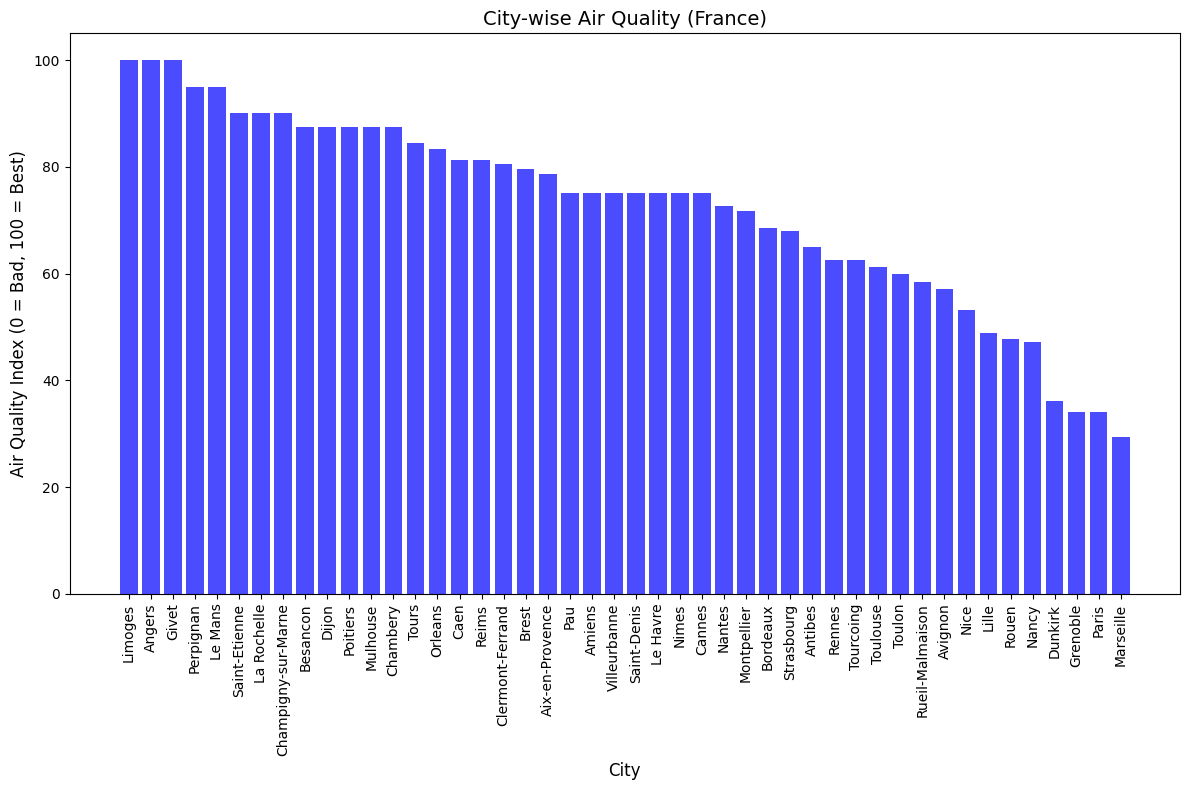

In [17]:
# Sort city data in descending order for Air Quality
sorted_air_quality = data_france.sort_values(by='AirQuality', ascending=False)

# Plot city-wise Air Quality
plt.figure(figsize=(12, 8))
plt.bar(sorted_air_quality['City'], sorted_air_quality['AirQuality'], color='blue', alpha=0.7)
plt.xlabel('City', fontsize=12)
plt.ylabel('Air Quality Index (0 = Bad, 100 = Best)', fontsize=12)
plt.title('City-wise Air Quality (France)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Water Pollution bar graph

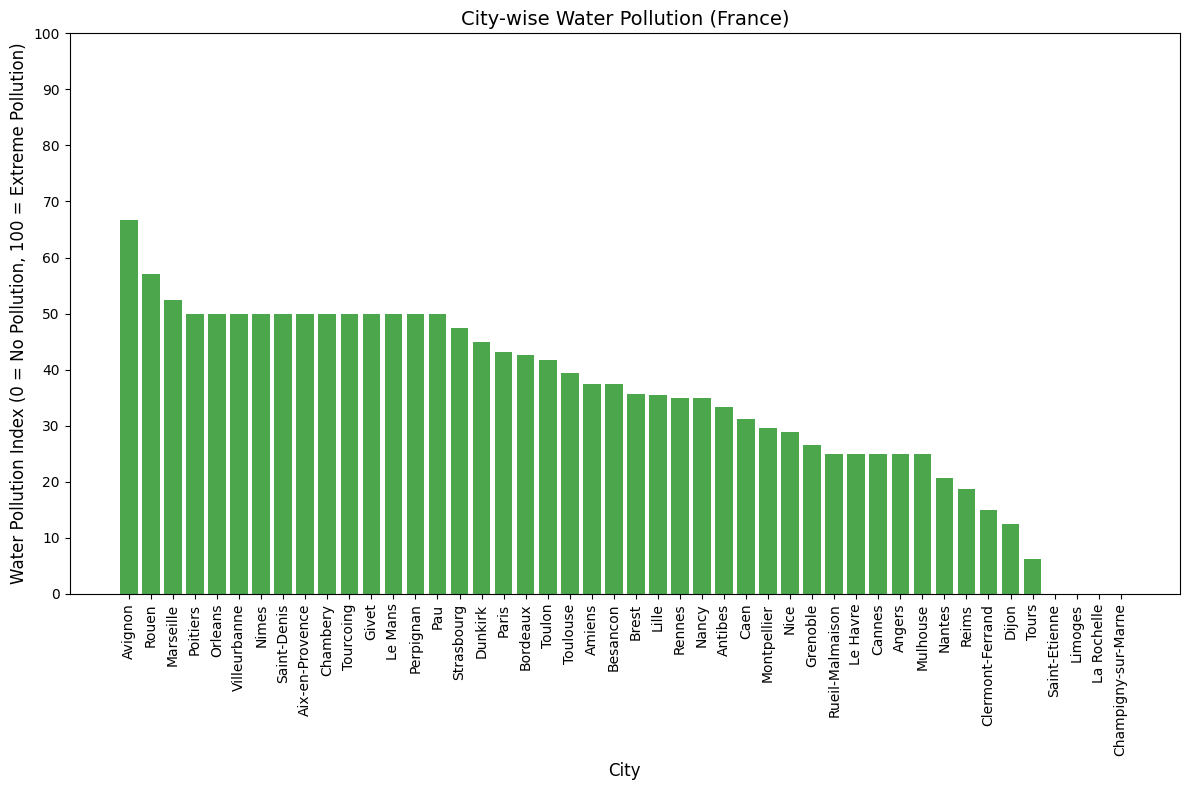

In [24]:
# Sort city data in descending order for Water Pollution
sorted_water_pollution = data_france.sort_values(by='WaterPollution', ascending=False)

# Plot city-wise Water Pollution
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_water_pollution['City'], sorted_water_pollution['WaterPollution'], color='green', alpha=0.7)
plt.xlabel('City', fontsize=12)
plt.ylabel('Water Pollution Index (0 = No Pollution, 100 = Extreme Pollution)', fontsize=12)
plt.title('City-wise Water Pollution (France)', fontsize=14)
plt.xticks(rotation=90)

# Set Y-axis ticks and range
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))  # Set Y-axis ticks at intervals of 10

plt.tight_layout()
plt.show()



# Graph Analysis :
The analysis uses two separate bar charts to evaluate air quality and water pollution across cities in France:
- Air Quality
  Cities were plotted on X-axis , with their air quality scores on the Y-axis. This clearly showed cities with the best air quality to worst air quality. This bar graph provides a clear comparison among cities from different regions of France. Cities like 'Limoges','Angers', 'Givet' have a very high air quality score and cities like 'Grenoble','Marseille' and 'Paris' have low score indicating poor air quality. It is quite evident that sub-urban or rural areas have less pollution. For example 'Givet' is a commune in northern France surrounded on three sides by the Belgian border, its population is only 6,356 (based on 2022 data Wikipedia - https://fr.wikipedia.org/wiki/Givet) , so the air quality is very good as compared to the city of 'Paris' with a population of 2.103 million (based on 2023 data Wikipedia - https://fr.wikipedia.org/wiki/Paris). It suggests that there are various factors like population, urbanization and others leading to variations in the Air quality index.

- Water Pollution
  Cities were plotted on X-axis , with their water pollution scores on the Y-axis. Cities like 'Avignon', 'Marseille' have high water pollution where as cities like 'Dijon', 'tours', 'Nantes' have less water pollution.This can be attributed to various factors like waste water treatement, Drinking Water Inaccessibility and government policies. Here is statistics from Numbeo showing High water pollution score at 'Avignon' compared to 'Lyon' - https://www.numbeo.com/pollution/compare_cities.jsp?country1=France&city1=Avignon&country2=France&city2=Lyon 
  Note:[The graph shows some cities with no bars like 'Limoges', 'La Rochelle' etc , because values for the water pollution score was 0 on the original dataset.]

  These city wise comparison can help Government and policy makers to prevent pollution and implement changes to improve the quality.

# Sub-Question 3: What is the relationship between air quality and water pollution in French cities?

Finding the correlation between air quality and water pollution can help us identify patterns as to whether air quality impacts water pollution or vice versa. Based on the dataset, Scatter plot shows the relation between the two. The correlation coefficient is also calculated to show the level of relation.

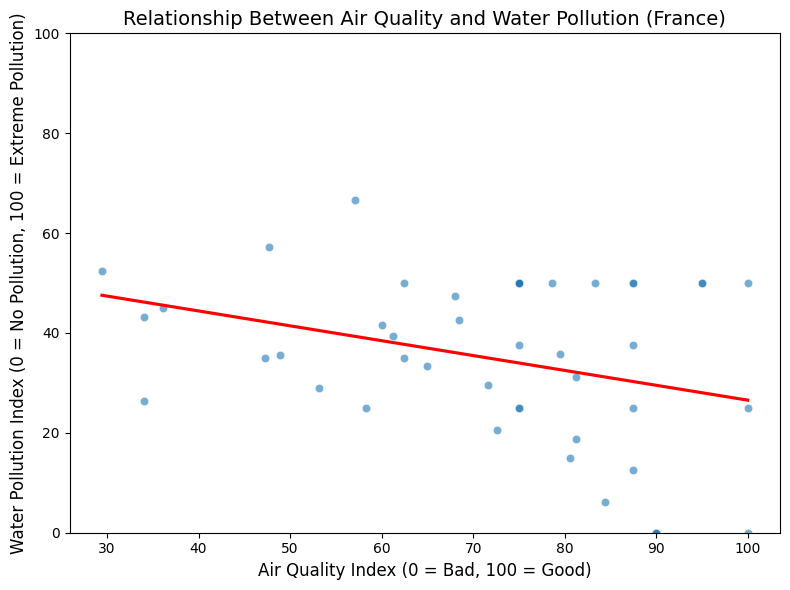

Correlation Coefficient (France): -0.33


In [20]:
# Plot scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_france, x='AirQuality', y='WaterPollution', alpha=0.6)
sns.regplot(data=data_france, x='AirQuality', y='WaterPollution', scatter=False, color='red', ci=None)

# Set axis labels, title, and Y-axis limit
plt.xlabel('Air Quality Index (0 = Bad, 100 = Good)', fontsize=12)
plt.ylabel('Water Pollution Index (0 = No Pollution, 100 = Extreme Pollution)', fontsize=12)
plt.title('Relationship Between Air Quality and Water Pollution (France)', fontsize=14)
plt.ylim(0, 100)  # Set Y-axis range from 0 to 100
plt.tight_layout()
plt.show()

# Calculate correlation coefficient for France-specific data
correlation_france = data_france['AirQuality'].corr(data_france['WaterPollution'])
print(f'Correlation Coefficient (France): {correlation_france:.2f}')

# Graph Analysis

The scatter plot illustrates a weak negative correlation between air quality and water pollution. Each point in the scatter plot represents a city, with its air quality and water pollution indices plotted on the X and Y axes, respectively. A regression line was added to visualize the overall trend, and the correlation coefficient was calculated as -0.33.

Cities with higher air quality indices (close to 100) generally have slightly lower water pollution indices. However, the weak negative correlation indicates that the relationship is not strong enough to imply causation. As the dataset is not large enough, it is not quite clear that one causes the other. 

# Conclusion

This project analyzed air quality and water pollution trends in France using data from Kaggle's "World Cities Air Quality and Water Pollution" dataset. The dataset was cleaned and preprocessed to ensure consistency and accuracy. Three sub-questions guided the analysis, focusing on regional and city-level trends and the relationship between air and water pollution along with detailed graphical analysis for each graph.

### Methodology and Results

- Regional Trends(sub question 1):

Bar charts revealed that "Ile-de-France" has higher air pollution levels compared to rural regions. Urbanization, means of transport and  industrialization are key contributors.

- City-Level Trends(sub question 2):

Separate analyses of air quality and water pollution highlighted cities like Limoges as benchmarks for good environmental quality, while Paris and Marseille were identified as high-pollution areas. By analyzing both the graphs , we can clearly see that there is no strong relation between air quality and water pollution.

- Correlation Analysis(sub question 3):

There was a weak neagative correlation of around -0.33 . The weak negative correlation between air and water pollution suggests different factors for these issues, emphasizing the need for targeted mitigation strategies.

### Limitations

The dataset was very small with limited number of records for a deeper analysis. The analysis relied on static data from 2020, limiting insights into trends over several years. Factors like population density, industrial zones, and local environmental policies were not included, potentially affecting the robustness of the findings.

### Recommendations

Future research should incorporate temporal data to analyze trends over time. Additional variables, such as industrial activity and waste management practices, should be included for a comprehensive analysis. Also Use of advanced data visualization techniques, such as heatmaps or geographic overlays, to enhance insights into spatial trends.

